You need to run
```bash
python src/run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 0.99 \
--limit_cs_margin 0. 10. 20 40. 60. 80. 100. 120. 140. 160. 180. \
--expe_name figure_7 \
--nb_process XXX \
--path_agents saved_model
```
before this notebook

In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
score_reco = 5.44
percentile_ = [20, 40, 50, 60, 80]

def plot_fig(dict_, x_label, path):
    x_plt = sorted(dict_.keys(),
                  key=lambda x: float(x))
    x_displ = [float(el) for el in x_plt]
    plt.figure(figsize=(10, 6))
    plt.fill_between(x_displ,
                    y1=[dict_[el][0] for el in x_plt],
                    y2=[dict_[el][4] for el in x_plt],
                    color="cornflowerblue",
                    alpha=0.3,
                    label=f"[{percentile_[0]}%-{percentile_[-1]}%]"
                    )
    plt.fill_between(x_displ,
                    y1=[dict_[el][1] for el in x_plt],
                    y2=[dict_[el][3] for el in x_plt],
                    color="cornflowerblue",
                    alpha=0.7,
                    label=f"[{percentile_[1]}%-{percentile_[-2]}%]"
                    )
    plt.plot(x_displ,
            [dict_[el][2] for el in x_plt], 
            color="cornflowerblue",
            label="median")
    if True:
        plt.plot((x_displ[0], x_displ[-1]),
                [score_reco, score_reco],
                color="red",
                linestyle="-.",
                label="Expert only")
        plt.plot((x_displ[0], x_displ[-1]),
                [0., 0.],
                color="red",
                linestyle=":",
                label="Do Nothing")
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel("score on validation set", fontsize=15)
    plt.grid()
    plt.legend() # loc="upper left")
    plt.savefig(path)

In [3]:
path = "."
with open (os.path.join(path, "agents_runs_figure_7.json"), "r") as f:
    dict_all_ = json.load(f)

In [4]:
score_limit_cs_margin = {}
nb_survived_limit_cs_margin = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            nb_survived_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
              score_this.append(tmp_res_model["score_avg"])  
            if score_this:
                score_limit_cs_margin[limit_cs_margin_] = (np.percentile(score_this, percentile_[0]),
                                              np.percentile(score_this, percentile_[1]),
                                              np.percentile(score_this, percentile_[2]),
                                              np.percentile(score_this, percentile_[3]),
                                              np.percentile(score_this, percentile_[4]),
                                              )
            if nb_survived_this:
                score_limit_cs_margin[limit_cs_margin_] = (np.percentile(nb_survived_this, percentile_[0]),
                                                    np.percentile(nb_survived_this, percentile_[1]),
                                                    np.percentile(nb_survived_this, percentile_[2]),
                                                    np.percentile(nb_survived_this, percentile_[3]),
                                                    np.percentile(nb_survived_this, percentile_[4]),
                                                    )


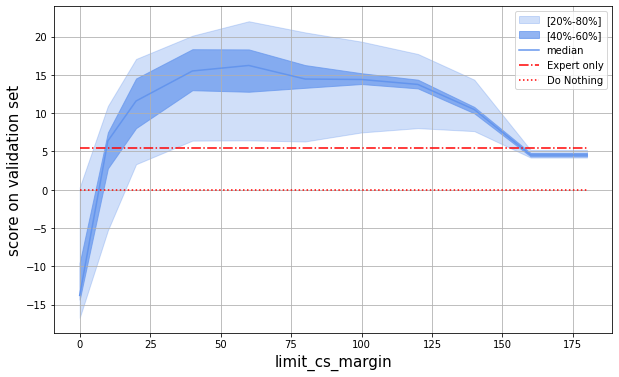

In [5]:
plot_fig(score_limit_cs_margin, "limit_cs_margin", "figure7.pdf")